## This notebook plots the data that the other notebook computes

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Given Counter data
petabases_counter =  {('Prokaryote', 'WGS/WGA'): 1337536637, ('Human', 'OTHER'): 4175010458, ('Metagenome', 'OTHER'): 698673154, ('Plant', 'WGS/WGA'): 3948094067, ('Mouse', 'OTHER'): 2099232371, ('Prokaryote', 'OTHER'): 92153348, ('Mammal', 'OTHER'): 696688033, ('Vertebrate', 'OTHER'): 452695920, ('Plant', 'OTHER'): 1293976973, ('Mammal', 'WGS/WGA'): 3108752753, ('Invertebrate', 'OTHER'): 487270872, ('Mouse', 'WGS/WGA'): 741610048, ('Other', 'WGS/WGA'): 372653970, ('Human', 'WGS/WGA'): 3437232410, ('Vertebrate', 'WGS/WGA'): 1403041500, ('Metagenome', 'WGS/WGA'): 2695259386, ('Plant', 'RNA-Seq'): 2580159244, ('Vertebrate', 'RNA-Seq'): 883797364, ('Virome', 'WGS/WGA'): 25321925, ('Human', 'RNA-Seq'): 6386799101, ('Metagenome', 'RNA-Seq'): 361678065, ('Virome', 'OTHER'): 25097506, ('Fungus', 'OTHER'): 126223433, ('Invertebrate', 'RNA-Seq'): 1112706460, ('Other', 'OTHER'): 77732261, ('Invertebrate', 'WGS/WGA'): 1455626745, ('Mammal', 'RNA-Seq'): 1553205222, ('Other', 'RNA-Seq'): 212404853, ('Mouse', 'RNA-Seq'): 4494480566, ('Fungus', 'RNA-Seq'): 328213251, ('Fungus', 'WGS/WGA'): 326412274, ('Virome', 'RNA-Seq'): 25626784, ('Prokaryote', 'RNA-Seq'): 259057796, ('SARS-CoV-2', 'WGS/WGA'): 69816907, ('SARS-CoV-2', 'OTHER'): 2832190239, ('SARS-CoV-2', 'RNA-Seq'): 22815125}
nbacc_counter = {('Prokaryote', 'WGS/WGA'): 2409136, ('Human', 'OTHER'): 1994238, ('Metagenome', 'OTHER'): 5019510, ('Plant', 'WGS/WGA'): 470742, ('Mouse', 'OTHER'): 936644, ('Prokaryote', 'OTHER'): 203422, ('Mammal', 'OTHER'): 321394, ('Vertebrate', 'OTHER'): 384623, ('Plant', 'OTHER'): 883296, ('Mammal', 'WGS/WGA'): 163283, ('Invertebrate', 'OTHER'): 311333, ('Mouse', 'WGS/WGA'): 55979, ('Other', 'WGS/WGA'): 276529, ('Human', 'WGS/WGA'): 423263, ('Vertebrate', 'WGS/WGA'): 177747, ('Metagenome', 'WGS/WGA'): 696777, ('Plant', 'RNA-Seq'): 526356, ('Vertebrate', 'RNA-Seq'): 210511, ('Virome', 'WGS/WGA'): 62189, ('Human', 'RNA-Seq'): 1636171, ('Metagenome', 'RNA-Seq'): 134911, ('Virome', 'OTHER'): 116061, ('Fungus', 'OTHER'): 121606, ('Invertebrate', 'RNA-Seq'): 317896, ('Other', 'OTHER'): 268504, ('Invertebrate', 'WGS/WGA'): 251069, ('Mammal', 'RNA-Seq'): 294394, ('Other', 'RNA-Seq'): 78619, ('Mouse', 'RNA-Seq'): 1853938, ('Fungus', 'RNA-Seq'): 100065, ('Fungus', 'WGS/WGA'): 168737, ('Virome', 'RNA-Seq'): 17175, ('Prokaryote', 'RNA-Seq'): 115412, ('SARS-CoV-2', 'WGS/WGA'): 260316, ('SARS-CoV-2', 'OTHER'): 6345530, ('SARS-CoV-2', 'RNA-Seq'): 60230}

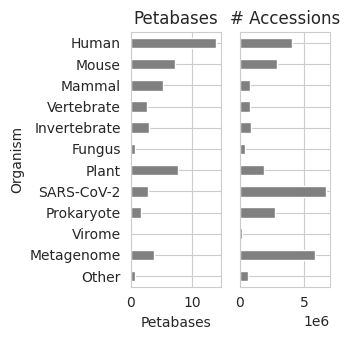

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Define the conversion factor (1 petabase)
PETABASE = 10**15

# Function to aggregate and normalize counts
def aggregate_and_normalize_counts(counter_data, normalize=False):
    aggregated_data = {}
    for (category1, category2), count in counter_data.items():
        if category1 in aggregated_data:
            aggregated_data[category1] += count
        else:
            aggregated_data[category1] = count
    if normalize:
        for key in aggregated_data:
            aggregated_data[key] /= (PETABASE/1000000) # it was megabases
    return aggregated_data

# Normalize petabases_counter values
petabases_aggregated = aggregate_and_normalize_counts(petabases_counter, normalize=True)
nbacc_aggregated = aggregate_and_normalize_counts(nbacc_counter)

# Convert aggregated data to DataFrames
df_petabases = pd.DataFrame(list(petabases_aggregated.items()), columns=['Organism', 'Count'])
df_nbacc = pd.DataFrame(list(nbacc_aggregated.items()), columns=['Organism', 'Count'])

# Define the desired order
desired_order = ['Human', 'Mouse', 'Mammal', 'Vertebrate', 'Invertebrate',  'Fungus', 'Plant', 'SARS-CoV-2',  'Prokaryote', 'Virome', 'Metagenome', 'Other'][::-1]

# Ensure the order in the DataFrame
df_petabases['Organism'] = pd.Categorical(df_petabases['Organism'], categories=desired_order, ordered=True)
df_nbacc['Organism'] = pd.Categorical(df_nbacc['Organism'], categories=desired_order, ordered=True)

# Set the background to white
sns.set_style("whitegrid")


# Sort the DataFrames based on the desired order
df_petabases = df_petabases.sort_values('Organism')
df_nbacc = df_nbacc.sort_values('Organism')

# Create the plots
fig, axes = plt.subplots(1, 2, figsize=(3.5, 3.5), sharey=True)

# Plot for Petabases
df_petabases.set_index('Organism').plot(kind='barh', stacked=True, ax=axes[0], color=['gray'])
axes[0].set_title('Petabases')
axes[0].set_xlabel('Petabases')
axes[0].set_ylabel('Organism')

# Plot for Number of Accessions
df_nbacc.set_index('Organism').plot(kind='barh', stacked=True, ax=axes[1], color=['gray'])
axes[1].set_title('# Accessions')
axes[1].set_xlabel('')
axes[1].set_ylabel('')


axes[0].get_legend().remove()
axes[1].get_legend().remove()


plt.tight_layout()
plt.savefig("simplified_assay_type_sra.svg", format="svg")
plt.show()


In [17]:
palmcores_counter =  {('Prokaryote', 'WGS/WGA'): 177285018, ('Human', 'OTHER'): 449625871, ('Metagenome', 'OTHER'): 272954821, ('Plant', 'WGS/WGA'): 254057206, ('Mouse', 'OTHER'): 218091520, ('Prokaryote', 'OTHER'): 18779186, ('Vertebrate', 'OTHER'): 51882542, ('Plant', 'OTHER'): 137977029, ('Mammal', 'WGS/WGA'): 215672097, ('Mouse', 'WGS/WGA'): 74027111, ('Other', 'WGS/WGA'): 51964904, ('Human', 'WGS/WGA'): 313726697, ('Vertebrate', 'WGS/WGA'): 113179229, ('Invertebrate', 'OTHER'): 43764023, ('Metagenome', 'WGS/WGA'): 964130982, ('Plant', 'RNA-Seq'): 377827837, ('Vertebrate', 'RNA-Seq'): 110250064, ('Virome', 'WGS/WGA'): 41375236, ('Human', 'RNA-Seq'): 1079140526, ('Virome', 'OTHER'): 33289174, ('Mammal', 'OTHER'): 64915529, ('Fungus', 'OTHER'): 15016661, ('Invertebrate', 'RNA-Seq'): 164568279, ('Other', 'OTHER'): 17706860, ('Invertebrate', 'WGS/WGA'): 169354895, ('Mammal', 'RNA-Seq'): 257305416, ('Other', 'RNA-Seq'): 31928342, ('Mouse', 'RNA-Seq'): 674516863, ('Metagenome', 'RNA-Seq'): 235178081, ('Fungus', 'RNA-Seq'): 39165430, ('Fungus', 'WGS/WGA'): 34116828, ('Virome', 'RNA-Seq'): 25329743, ('Prokaryote', 'RNA-Seq'): 35003669, ('SARS-CoV-2', 'WGS/WGA'): 331773897, ('SARS-CoV-2', 'OTHER'): 9612787236, ('SARS-CoV-2', 'RNA-Seq'): 77104154}
beetle_counter = {('Prokaryote', 'WGS/WGA'): 2119199817, ('Human', 'OTHER'): 4345707067, ('Metagenome', 'OTHER'): 17212416339, ('Plant', 'WGS/WGA'): 4774651669, ('Mouse', 'OTHER'): 1814437405, ('Prokaryote', 'OTHER'): 326454157, ('Vertebrate', 'OTHER'): 373401751, ('Plant', 'OTHER'): 1759506251, ('Mammal', 'WGS/WGA'): 1790781988, ('Mouse', 'WGS/WGA'): 337426553, ('Other', 'WGS/WGA'): 379168255, ('Human', 'WGS/WGA'): 2668975618, ('Vertebrate', 'WGS/WGA'): 750843328, ('Invertebrate', 'OTHER'): 508320036, ('Metagenome', 'WGS/WGA'): 14808294745, ('Plant', 'RNA-Seq'): 6672273326, ('Vertebrate', 'RNA-Seq'): 2223651618, ('Virome', 'WGS/WGA'): 69534808, ('Human', 'RNA-Seq'): 12998081788, ('Virome', 'OTHER'): 30481558, ('Mammal', 'OTHER'): 527323498, ('Fungus', 'OTHER'): 304067619, ('Invertebrate', 'RNA-Seq'): 2779551308, ('Other', 'OTHER'): 255200480, ('Invertebrate', 'WGS/WGA'): 1409540270, ('Mammal', 'RNA-Seq'): 3195040745, ('Other', 'RNA-Seq'): 462100900, ('Mouse', 'RNA-Seq'): 9844028596, ('Metagenome', 'RNA-Seq'): 2425555761, ('Fungus', 'RNA-Seq'): 868327858, ('Fungus', 'WGS/WGA'): 842089909, ('Virome', 'RNA-Seq'): 91878256, ('Prokaryote', 'RNA-Seq'): 505164172, ('SARS-CoV-2', 'WGS/WGA'): 36367418, ('SARS-CoV-2', 'OTHER'): 555841380, ('SARS-CoV-2', 'RNA-Seq'): 37161326}
Var_Obelisk_counter =  {('Prokaryote', 'WGS/WGA'): 2880, ('Human', 'OTHER'): 80859, ('Metagenome', 'OTHER'): 202380, ('Plant', 'WGS/WGA'): 3722, ('Mouse', 'OTHER'): 4855, ('Prokaryote', 'OTHER'): 218, ('Vertebrate', 'OTHER'): 13586, ('Plant', 'OTHER'): 1317, ('Mammal', 'WGS/WGA'): 3865, ('Mouse', 'WGS/WGA'): 1459, ('Other', 'WGS/WGA'): 389, ('Human', 'WGS/WGA'): 16903, ('Vertebrate', 'WGS/WGA'): 35153, ('Invertebrate', 'OTHER'): 670, ('Metagenome', 'WGS/WGA'): 215709, ('Plant', 'RNA-Seq'): 21606, ('Vertebrate', 'RNA-Seq'): 47583, ('Virome', 'WGS/WGA'): 4699, ('Human', 'RNA-Seq'): 68697, ('Virome', 'OTHER'): 361, ('Mammal', 'OTHER'): 3473, ('Fungus', 'OTHER'): 411, ('Invertebrate', 'RNA-Seq'): 18200, ('Other', 'OTHER'): 364, ('Invertebrate', 'WGS/WGA'): 2338, ('Mammal', 'RNA-Seq'): 156118, ('Other', 'RNA-Seq'): 2656, ('Mouse', 'RNA-Seq'): 27029, ('Metagenome', 'RNA-Seq'): 1861019, ('Fungus', 'RNA-Seq'): 1528, ('Fungus', 'WGS/WGA'): 34109, ('Virome', 'RNA-Seq'): 4061, ('Prokaryote', 'RNA-Seq'): 41856, ('SARS-CoV-2', 'WGS/WGA'): 1213, ('SARS-CoV-2', 'OTHER'): 4489, ('SARS-CoV-2', 'RNA-Seq'): 2442}
Var_Deltavirus_counter =  {('Prokaryote', 'WGS/WGA'): 389, ('Human', 'OTHER'): 1859, ('Metagenome', 'OTHER'): 413, ('Plant', 'WGS/WGA'): 49, ('Mouse', 'OTHER'): 45, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 58, ('Plant', 'OTHER'): 404, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 0, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 227, ('Vertebrate', 'WGS/WGA'): 16, ('Invertebrate', 'OTHER'): 410, ('Metagenome', 'WGS/WGA'): 665, ('Plant', 'RNA-Seq'): 42, ('Vertebrate', 'RNA-Seq'): 1836, ('Virome', 'WGS/WGA'): 66, ('Human', 'RNA-Seq'): 10936, ('Virome', 'OTHER'): 16816, ('Mammal', 'OTHER'): 3, ('Fungus', 'OTHER'): 25, ('Invertebrate', 'RNA-Seq'): 2011, ('Other', 'OTHER'): 13, ('Invertebrate', 'WGS/WGA'): 1430, ('Mammal', 'RNA-Seq'): 631, ('Other', 'RNA-Seq'): 10, ('Mouse', 'RNA-Seq'): 90, ('Metagenome', 'RNA-Seq'): 1495, ('Fungus', 'RNA-Seq'): 0, ('Fungus', 'WGS/WGA'): 1, ('Virome', 'RNA-Seq'): 491, ('Prokaryote', 'RNA-Seq'): 0, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0}
Var_Osiris_counter = {('Prokaryote', 'WGS/WGA'): 1, ('Human', 'OTHER'): 7, ('Metagenome', 'OTHER'): 137, ('Plant', 'WGS/WGA'): 117, ('Mouse', 'OTHER'): 1, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 2, ('Plant', 'OTHER'): 6, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 2, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 5, ('Vertebrate', 'WGS/WGA'): 9, ('Invertebrate', 'OTHER'): 6, ('Metagenome', 'WGS/WGA'): 187, ('Plant', 'RNA-Seq'): 286, ('Vertebrate', 'RNA-Seq'): 17, ('Virome', 'WGS/WGA'): 2, ('Human', 'RNA-Seq'): 94, ('Virome', 'OTHER'): 0, ('Mammal', 'OTHER'): 2, ('Fungus', 'OTHER'): 1, ('Invertebrate', 'RNA-Seq'): 133, ('Other', 'OTHER'): 0, ('Invertebrate', 'WGS/WGA'): 9, ('Mammal', 'RNA-Seq'): 8, ('Other', 'RNA-Seq'): 3, ('Mouse', 'RNA-Seq'): 52, ('Metagenome', 'RNA-Seq'): 1026, ('Fungus', 'RNA-Seq'): 887, ('Fungus', 'WGS/WGA'): 0, ('Virome', 'RNA-Seq'): 8, ('Prokaryote', 'RNA-Seq'): 11, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0}
Papilloma_counter = {('Prokaryote', 'WGS/WGA'): 9376328, ('Human', 'OTHER'): 112464431, ('Metagenome', 'OTHER'): 16939314, ('Plant', 'WGS/WGA'): 1063714, ('Mouse', 'OTHER'): 3254772, ('Prokaryote', 'OTHER'): 749683, ('Vertebrate', 'OTHER'): 352097, ('Plant', 'OTHER'): 1099353, ('Mammal', 'WGS/WGA'): 15688654, ('Mouse', 'WGS/WGA'): 268464, ('Other', 'WGS/WGA'): 1581996, ('Human', 'WGS/WGA'): 78876330, ('Vertebrate', 'WGS/WGA'): 464096, ('Invertebrate', 'OTHER'): 533388, ('Metagenome', 'WGS/WGA'): 48846647, ('Plant', 'RNA-Seq'): 2414054, ('Vertebrate', 'RNA-Seq'): 851388, ('Virome', 'WGS/WGA'): 771983, ('Human', 'RNA-Seq'): 199923321, ('Virome', 'OTHER'): 1609359, ('Mammal', 'OTHER'): 3262598, ('Fungus', 'OTHER'): 178183, ('Invertebrate', 'RNA-Seq'): 1533218, ('Other', 'OTHER'): 1512525, ('Invertebrate', 'WGS/WGA'): 1881812, ('Mammal', 'RNA-Seq'): 12198954, ('Other', 'RNA-Seq'): 1021559, ('Mouse', 'RNA-Seq'): 6529337, ('Metagenome', 'RNA-Seq'): 1957169, ('Fungus', 'RNA-Seq'): 284208, ('Fungus', 'WGS/WGA'): 170083, ('Virome', 'RNA-Seq'): 428768, ('Prokaryote', 'RNA-Seq'): 1366337, ('SARS-CoV-2', 'WGS/WGA'): 555665, ('SARS-CoV-2', 'OTHER'): 2569680, ('SARS-CoV-2', 'RNA-Seq'): 242107}

# version counting nb of accs instead of nb of hit:
palmcores_counter =  {('Prokaryote', 'WGS/WGA'): 2341160, ('Human', 'OTHER'): 1529268, ('Metagenome', 'OTHER'): 2628747, ('Plant', 'WGS/WGA'): 407245, ('Mouse', 'OTHER'): 799481, ('Prokaryote', 'OTHER'): 122250, ('Vertebrate', 'OTHER'): 227638, ('Plant', 'OTHER'): 567399, ('Mammal', 'WGS/WGA'): 135832, ('Mouse', 'WGS/WGA'): 51059, ('Other', 'WGS/WGA'): 174413, ('Human', 'WGS/WGA'): 360410, ('Vertebrate', 'WGS/WGA'): 145488, ('Invertebrate', 'OTHER'): 188346, ('Metagenome', 'WGS/WGA'): 615214, ('Plant', 'RNA-Seq'): 503686, ('Vertebrate', 'RNA-Seq'): 195756, ('Virome', 'WGS/WGA'): 53495, ('Human', 'RNA-Seq'): 1487554, ('Virome', 'OTHER'): 47044, ('Mammal', 'OTHER'): 215172, ('Fungus', 'OTHER'): 67267, ('Invertebrate', 'RNA-Seq'): 294334, ('Other', 'OTHER'): 125204, ('Invertebrate', 'WGS/WGA'): 218660, ('Mammal', 'RNA-Seq'): 252907, ('Other', 'RNA-Seq'): 70342, ('Mouse', 'RNA-Seq'): 1693343, ('Metagenome', 'RNA-Seq'): 100862, ('Fungus', 'RNA-Seq'): 94761, ('Fungus', 'WGS/WGA'): 157506, ('Virome', 'RNA-Seq'): 15466, ('Prokaryote', 'RNA-Seq'): 108985, ('SARS-CoV-2', 'WGS/WGA'): 253456, ('SARS-CoV-2', 'OTHER'): 6206142, ('SARS-CoV-2', 'RNA-Seq'): 57831}
beetle_counter = {('Prokaryote', 'WGS/WGA'): 2356608, ('Human', 'OTHER'): 1456739, ('Metagenome', 'OTHER'): 4656806, ('Plant', 'WGS/WGA'): 419029, ('Mouse', 'OTHER'): 817585, ('Prokaryote', 'OTHER'): 146786, ('Vertebrate', 'OTHER'): 280566, ('Plant', 'OTHER'): 704394, ('Mammal', 'WGS/WGA'): 137444, ('Mouse', 'WGS/WGA'): 51763, ('Other', 'WGS/WGA'): 155076, ('Human', 'WGS/WGA'): 344799, ('Vertebrate', 'WGS/WGA'): 154072, ('Invertebrate', 'OTHER'): 233126, ('Metagenome', 'WGS/WGA'): 651215, ('Plant', 'RNA-Seq'): 507997, ('Vertebrate', 'RNA-Seq'): 198760, ('Virome', 'WGS/WGA'): 35659, ('Human', 'RNA-Seq'): 1491819, ('Virome', 'OTHER'): 28103, ('Mammal', 'OTHER'): 236648, ('Fungus', 'OTHER'): 81015, ('Invertebrate', 'RNA-Seq'): 300262, ('Other', 'OTHER'): 106372, ('Invertebrate', 'WGS/WGA'): 222339, ('Mammal', 'RNA-Seq'): 259206, ('Other', 'RNA-Seq'): 71981, ('Mouse', 'RNA-Seq'): 1721350, ('Metagenome', 'RNA-Seq'): 128554, ('Fungus', 'RNA-Seq'): 96643, ('Fungus', 'WGS/WGA'): 161433, ('Virome', 'RNA-Seq'): 11350, ('Prokaryote', 'RNA-Seq'): 111772, ('SARS-CoV-2', 'WGS/WGA'): 246176, ('SARS-CoV-2', 'OTHER'): 5753651, ('SARS-CoV-2', 'RNA-Seq'): 44802}
Var_Obelisk_counter =  {('Prokaryote', 'WGS/WGA'): 197, ('Human', 'OTHER'): 71091, ('Metagenome', 'OTHER'): 3078, ('Plant', 'WGS/WGA'): 2251, ('Mouse', 'OTHER'): 1381, ('Prokaryote', 'OTHER'): 53, ('Vertebrate', 'OTHER'): 9348, ('Plant', 'OTHER'): 543, ('Mammal', 'WGS/WGA'): 1156, ('Mouse', 'WGS/WGA'): 405, ('Other', 'WGS/WGA'): 294, ('Human', 'WGS/WGA'): 15510, ('Vertebrate', 'WGS/WGA'): 31321, ('Invertebrate', 'OTHER'): 294, ('Metagenome', 'WGS/WGA'): 8751, ('Plant', 'RNA-Seq'): 1464, ('Vertebrate', 'RNA-Seq'): 30211, ('Virome', 'WGS/WGA'): 214, ('Human', 'RNA-Seq'): 5967, ('Virome', 'OTHER'): 28, ('Mammal', 'OTHER'): 477, ('Fungus', 'OTHER'): 92, ('Invertebrate', 'RNA-Seq'): 1524, ('Other', 'OTHER'): 66, ('Invertebrate', 'WGS/WGA'): 1916, ('Mammal', 'RNA-Seq'): 1540, ('Other', 'RNA-Seq'): 205, ('Mouse', 'RNA-Seq'): 1465, ('Metagenome', 'RNA-Seq'): 13175, ('Fungus', 'RNA-Seq'): 130, ('Fungus', 'WGS/WGA'): 145, ('Virome', 'RNA-Seq'): 140, ('Prokaryote', 'RNA-Seq'): 787, ('SARS-CoV-2', 'WGS/WGA'): 107, ('SARS-CoV-2', 'OTHER'): 291, ('SARS-CoV-2', 'RNA-Seq'): 112}
Var_Deltavirus_counter =  {('Prokaryote', 'WGS/WGA'): 17, ('Human', 'OTHER'): 32, ('Metagenome', 'OTHER'): 63, ('Plant', 'WGS/WGA'): 9, ('Mouse', 'OTHER'): 2, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 6, ('Plant', 'OTHER'): 19, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 0, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 3, ('Vertebrate', 'WGS/WGA'): 16, ('Invertebrate', 'OTHER'): 89, ('Metagenome', 'WGS/WGA'): 143, ('Plant', 'RNA-Seq'): 25, ('Vertebrate', 'RNA-Seq'): 111, ('Virome', 'WGS/WGA'): 4, ('Human', 'RNA-Seq'): 126, ('Virome', 'OTHER'): 156, ('Mammal', 'OTHER'): 2, ('Fungus', 'OTHER'): 1, ('Invertebrate', 'RNA-Seq'): 323, ('Other', 'OTHER'): 4, ('Invertebrate', 'WGS/WGA'): 247, ('Mammal', 'RNA-Seq'): 29, ('Other', 'RNA-Seq'): 2, ('Mouse', 'RNA-Seq'): 7, ('Metagenome', 'RNA-Seq'): 342, ('Fungus', 'RNA-Seq'): 0, ('Fungus', 'WGS/WGA'): 1, ('Virome', 'RNA-Seq'): 16, ('Prokaryote', 'RNA-Seq'): 0, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0}
Var_Osiris_counter = {('Prokaryote', 'WGS/WGA'): 1, ('Human', 'OTHER'): 4, ('Metagenome', 'OTHER'): 99, ('Plant', 'WGS/WGA'): 116, ('Mouse', 'OTHER'): 1, ('Prokaryote', 'OTHER'): 0, ('Vertebrate', 'OTHER'): 1, ('Plant', 'OTHER'): 5, ('Mammal', 'WGS/WGA'): 4, ('Mouse', 'WGS/WGA'): 2, ('Other', 'WGS/WGA'): 0, ('Human', 'WGS/WGA'): 5, ('Vertebrate', 'WGS/WGA'): 9, ('Invertebrate', 'OTHER'): 4, ('Metagenome', 'WGS/WGA'): 136, ('Plant', 'RNA-Seq'): 201, ('Vertebrate', 'RNA-Seq'): 13, ('Virome', 'WGS/WGA'): 1, ('Human', 'RNA-Seq'): 25, ('Virome', 'OTHER'): 0, ('Mammal', 'OTHER'): 1, ('Fungus', 'OTHER'): 1, ('Invertebrate', 'RNA-Seq'): 60, ('Other', 'OTHER'): 0, ('Invertebrate', 'WGS/WGA'): 6, ('Mammal', 'RNA-Seq'): 8, ('Other', 'RNA-Seq'): 2, ('Mouse', 'RNA-Seq'): 16, ('Metagenome', 'RNA-Seq'): 457, ('Fungus', 'RNA-Seq'): 112, ('Fungus', 'WGS/WGA'): 0, ('Virome', 'RNA-Seq'): 5, ('Prokaryote', 'RNA-Seq'): 7, ('SARS-CoV-2', 'WGS/WGA'): 0, ('SARS-CoV-2', 'OTHER'): 0, ('SARS-CoV-2', 'RNA-Seq'): 0}
Papilloma_counter = {('Prokaryote', 'WGS/WGA'): 1692091, ('Human', 'OTHER'): 1255533, ('Metagenome', 'OTHER'): 1962855, ('Plant', 'WGS/WGA'): 171119, ('Mouse', 'OTHER'): 310918, ('Prokaryote', 'OTHER'): 67647, ('Vertebrate', 'OTHER'): 33039, ('Plant', 'OTHER'): 122238, ('Mammal', 'WGS/WGA'): 98180, ('Mouse', 'WGS/WGA'): 26332, ('Other', 'WGS/WGA'): 69175, ('Human', 'WGS/WGA'): 349335, ('Vertebrate', 'WGS/WGA'): 67538, ('Invertebrate', 'OTHER'): 51980, ('Metagenome', 'WGS/WGA'): 528403, ('Plant', 'RNA-Seq'): 324669, ('Vertebrate', 'RNA-Seq'): 141497, ('Virome', 'WGS/WGA'): 21310, ('Human', 'RNA-Seq'): 1339362, ('Virome', 'OTHER'): 13871, ('Mammal', 'OTHER'): 114848, ('Fungus', 'OTHER'): 13812, ('Invertebrate', 'RNA-Seq'): 176516, ('Other', 'OTHER'): 31443, ('Invertebrate', 'WGS/WGA'): 134835, ('Mammal', 'RNA-Seq'): 216899, ('Other', 'RNA-Seq'): 46062, ('Mouse', 'RNA-Seq'): 1078468, ('Metagenome', 'RNA-Seq'): 88868, ('Fungus', 'RNA-Seq'): 32793, ('Fungus', 'WGS/WGA'): 19794, ('Virome', 'RNA-Seq'): 7702, ('Prokaryote', 'RNA-Seq'): 73803, ('SARS-CoV-2', 'WGS/WGA'): 50375, ('SARS-CoV-2', 'OTHER'): 430638, ('SARS-CoV-2', 'RNA-Seq'): 4448}

# new pv/an run
Papilloma_counter = {('Human', 'OTHER'): 710150, ('Metagenome', 'OTHER'): 186291, ('Plant', 'WGS/WGA'): 267894, ('Mouse', 'OTHER'): 472192, ('Prokaryote', 'WGS/WGA'): 1166860, ('Plant', 'OTHER'): 249587, ('Mammal', 'WGS/WGA'): 51204, ('Mouse', 'WGS/WGA'): 22259, ('Other', 'WGS/WGA'): 76732, ('Human', 'WGS/WGA'): 77781, ('Vertebrate', 'WGS/WGA'): 71462, ('Metagenome', 'WGS/WGA'): 449894, ('Plant', 'RNA-Seq'): 435176, ('Vertebrate', 'OTHER'): 105502, ('Virome', 'WGS/WGA'): 9242, ('Human', 'RNA-Seq'): 961448, ('Virome', 'OTHER'): 6755, ('Invertebrate', 'OTHER'): 87059, ('Invertebrate', 'RNA-Seq'): 200264, ('Invertebrate', 'WGS/WGA'): 179043, ('Mammal', 'RNA-Seq'): 204909, ('Fungus', 'OTHER'): 24989, ('Mammal', 'OTHER'): 74716, ('Other', 'RNA-Seq'): 47721, ('Mouse', 'RNA-Seq'): 1075289, ('Prokaryote', 'OTHER'): 26917, ('Vertebrate', 'RNA-Seq'): 149773, ('Metagenome', 'RNA-Seq'): 43240, ('Fungus', 'RNA-Seq'): 64637, ('Fungus', 'WGS/WGA'): 64902, ('Virome', 'RNA-Seq'): 6140, ('Other', 'OTHER'): 17150, ('Prokaryote', 'RNA-Seq'): 62111, ('SARS-CoV-2', 'OTHER'): 132137, ('SARS-CoV-2', 'WGS/WGA'): 8058, ('SARS-CoV-2', 'RNA-Seq'): 5571}
Anello_counter = {('Human', 'OTHER'): 837697, ('Metagenome', 'OTHER'): 184149, ('Plant', 'WGS/WGA'): 277432, ('Mouse', 'OTHER'): 552333, ('Prokaryote', 'WGS/WGA'): 850646, ('Plant', 'OTHER'): 282730, ('Mammal', 'WGS/WGA'): 52761, ('Mouse', 'WGS/WGA'): 20700, ('Other', 'WGS/WGA'): 77116, ('Human', 'WGS/WGA'): 82719, ('Vertebrate', 'WGS/WGA'): 72939, ('Metagenome', 'WGS/WGA'): 448856, ('Plant', 'RNA-Seq'): 452183, ('Vertebrate', 'OTHER'): 115142, ('Virome', 'WGS/WGA'): 10119, ('Human', 'RNA-Seq'): 935054, ('Virome', 'OTHER'): 5714, ('Invertebrate', 'OTHER'): 96573, ('Invertebrate', 'RNA-Seq'): 208061, ('Invertebrate', 'WGS/WGA'): 181247, ('Mammal', 'RNA-Seq'): 207018, ('Fungus', 'OTHER'): 30992, ('Mammal', 'OTHER'): 82670, ('Other', 'RNA-Seq'): 46154, ('Mouse', 'RNA-Seq'): 957653, ('Prokaryote', 'OTHER'): 31872, ('Vertebrate', 'RNA-Seq'): 152658, ('Metagenome', 'RNA-Seq'): 42175, ('Fungus', 'RNA-Seq'): 72258, ('Fungus', 'WGS/WGA'): 92096, ('Virome', 'RNA-Seq'): 5967, ('Other', 'OTHER'): 20517, ('Prokaryote', 'RNA-Seq'): 67379, ('SARS-CoV-2', 'OTHER'): 40945, ('SARS-CoV-2', 'WGS/WGA'): 4407, ('SARS-CoV-2', 'RNA-Seq'): 2746}


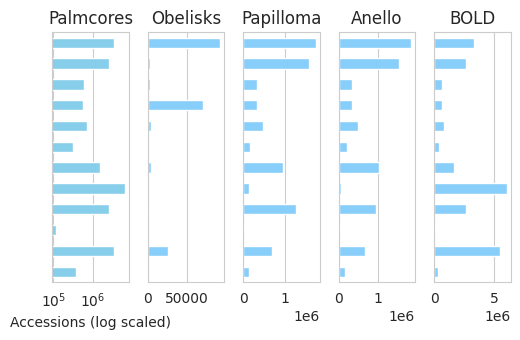

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FixedLocator

# Function to aggregate counts and convert to gigabases
def aggregate_and_convert(counter_data, factor=1):
    aggregated_data = {}
    for (category1, category2), count in counter_data.items():
        if category1 in aggregated_data:
            aggregated_data[category1] += count
        else:
            aggregated_data[category1] = count
    # Convert to gigabases
    aggregated_data = {k: v / factor for k, v in aggregated_data.items()}
    return aggregated_data

# Convert all counters to gigabases and aggregate
counters = [palmcores_counter, beetle_counter, Var_Obelisk_counter, Var_Deltavirus_counter, Var_Osiris_counter, Papilloma_counter, Anello_counter]
counter_names = ['PalmCores', 'Beetle', 'Var_Obelisk', 'Var_Deltavirus', 'Var_Osiris', 'Papilloma', 'Anello']

dfs = []
for counter, name in zip(counters, counter_names):
    aggregated_data = aggregate_and_convert(counter)
    df = pd.DataFrame(list(aggregated_data.items()), columns=['Organism', name])
    dfs.append(df)

# Merge all data
merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='Organism', how='outer')

# Set the desired order
desired_order = ['Human', 'Mouse', 'Mammal', 'Vertebrate', 'Invertebrate', 'Fungus', 'Plant', 'SARS-CoV-2', 'Prokaryote', 'Virome', 'Metagenome', 'Other'][::-1]
merged_df['Organism'] = pd.Categorical(merged_df['Organism'], categories=desired_order, ordered=True)
merged_df = merged_df.sort_values('Organism')

# Set the background to white
sns.set_style("whitegrid")

# Create the plots
fig, axes = plt.subplots(1, 5, figsize=(5, 3.5), sharey=True)

# Plot for PalmCores, Beetle, and Papilloma
merged_df[['Organism', 'PalmCores']].set_index('Organism').plot(kind='barh', stacked=True, ax=axes[0], color=['skyblue'], logx=True)
axes[0].set_title('Palmcores')
axes[0].set_xlabel('Accessions (log scaled)')
axes[0].set_ylabel('Organism')
#axes[0].xaxis.set_major_locator(FixedLocator([0, 1, 2, 3, 4, 5]))

# Plot for Var_Obelisk, Var_Deltavirus, Var_Osiris
merged_df[['Organism', 'Var_Obelisk']].set_index('Organism').plot(kind='barh', stacked=True, ax=axes[1], color=['lightskyblue'])
axes[1].set_title('Obelisks')
#axes[1].set_xlabel('Hits')
axes[1].set_ylabel('')
#axes[1].xaxis.set_major_locator(FixedLocator([0, 1, 2, 3, 4, 5]))

# Plot for pv, an
merged_df[['Organism', 'Papilloma']].set_index('Organism').plot(kind='barh', stacked=True, ax=axes[2], color=['lightskyblue'])
axes[2].set_title('Papilloma')
axes[2].set_ylabel('')
merged_df[['Organism',  'Anello']].set_index('Organism').plot(kind='barh', stacked=True, ax=axes[3], color=['lightskyblue'])
axes[3].set_title('Anello')
axes[3].set_ylabel('')


# Plot for BOLD
merged_df[['Organism', 'Beetle']].set_index('Organism').plot(kind='barh', stacked=True, ax=axes[4], color=['lightskyblue'])
axes[4].set_title('BOLD')
#axes[1].set_xlabel('Hits')
axes[4].set_ylabel('')
#axes[1].xaxis.set_major_locator(FixedLocator([0, 1, 2, 3, 4, 5]))

for i in range(5):
    axes[i].get_legend().remove()

# to combine with other plot
plt.yticks([])
plt.ylabel([])
axes[0].set_ylabel('')

plt.tight_layout()
plt.savefig("simplified_assay_type_palmcores_obelisks.svg", format="svg")
plt.show()
